## Download and use pretrained word embeddings form GloVe model

In [3]:
#####################################################################
###################  use pretrained model: GloVe  ###################
#####################################################################


######################### install environment ##########################
## install environment is needed
## pip install numpy
## pip install scipy
## pip install matplotlib
## pip install sklearn


############################  Resources  #################################
## file download link: (Wikipedia 2014 + Gigaword 5 vectors) 
## http://nlp.stanford.edu/data/glove.6B.zip

## other GloVe download page:
## https://nlp.stanford.edu/projects/glove/

## ref: https://medium.com/analytics-vidhya/basics-of-using-pre-trained-glove-vectors-in-python-d38905f356db

######################## if use google colab #########################
## if use google colab: use the following code to download and unzip it.
## if do not use google colab, jump to the next block
import os
import urllib.request
import zipfile
source_url = "http://nlp.stanford.edu/data/glove.6B.zip"
zip_name = "GloVe.zip"
if (os.path.exists(zip_name) == False):
    urllib.request.urlretrieve(source_url,zip_name)
data_dir = "GloVe"
with zipfile.ZipFile(zip_name, 'r') as zip_ref:
    zip_ref.extractall(data_dir)



############################ library used ###########################
## if do not use google colab, download data from the resource block 
import numpy as np


########################## create a dictionary #######################
## to create a dictionary that can: embeddings_dict[input_your_word] --> output its embedding
## create a empty dictionary
embeddings_dict = {}
## open file as f
filePath = "GloVe/glove.6B.50d.txt"
with open(filePath, 'r') as f:
    ## for each line, transfer a string like: 'business 0.023693 0.13316 0.023131' 
    ##                  into a list like ['business', '0.023693', '0.13316', '0.023131']
    for line in f:
        values = line.split()
        word = values[0]
        ## then, put all the number into an np.array using np.asarray(input_array, data_type)
        vector = np.asarray(values[1:], dtype="float32")
        embeddings_dict[word] = vector






## Test
check any word embedding

In [47]:
test_word = 'great'
embedding = embeddings_dict[test_word]
print(f'embedding of word {test_word}:','\n',embedding)

embedding of word great: 
 [-0.026567  1.3357   -1.028    -0.3729    0.52012  -0.12699  -0.35433
  0.37824  -0.29716   0.093894 -0.034122  0.92961  -0.14023  -0.63299
  0.020801 -0.21533   0.96923   0.47654  -1.0039   -0.24013  -0.36325
 -0.004757 -0.5148   -0.4626    1.2447   -1.8316   -1.5581   -0.37465
  0.53362   0.20883   3.2209    0.64549   0.37438  -0.17657  -0.024164
  0.33786  -0.419     0.40081  -0.11449   0.051232 -0.15205   0.29855
 -0.44052   0.11089  -0.24633   0.66251  -0.26949  -0.49658  -0.41618
 -0.2549  ]


## visualization
1. Transfer 50 demension embedding to two demensional points (x,y)

In [12]:
import numpy as np
from sklearn.manifold import TSNE

words = list(embeddings_dict.keys())
embeddings = list(embeddings_dict.values())

words = words[:40000]
embeddings = embeddings[:40000]

tsne_model_2d = TSNE(n_components=2)
embeddings_2d = tsne_model_2d.fit_transform(embeddings)



2. show the similarity of words

  for example: ['king','queen','cat','dog','student','professor','computer','animal','justice','judge','wood','tree','forest','love','bear','masters','hate']

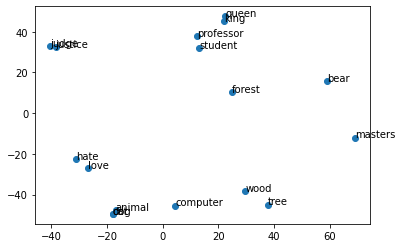

In [43]:

target_word_list = ['king','queen','cat','dog','student','professor','computer','animal','justice','judge','wood','tree','forest','love','bear','masters','hate']
indexes = []
for word in target_word_list:
  indexes.append(words.index(word))

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
L = len(embeddings_2d)
x = [embeddings_2d[x][0] for x in indexes]
y = [embeddings_2d[x][1] for x in indexes]
ax.scatter(x,y)
## 
for i in indexes:
  ax.annotate(words[i],(embeddings_2d[i][0],embeddings_2d[i][1]))
